<a href="https://colab.research.google.com/github/Mayu-infinite/Practice/blob/main/principal_component_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the dataset

In [ ]:
dataset = pd.read_csv(r'./Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA

In [ ]:
X_train.shape

(124, 13)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
X_train_pca.shape

(124, 2)

# Training the Logistic Regression model on the Training set

## With PCA transformation


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_pca = LogisticRegression(random_state = 0)
classifier_pca.fit(X_train_pca, y_train)

LogisticRegression(random_state=0)

## Without PCA transformation

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

# Model evaluation

## With PCA transformation


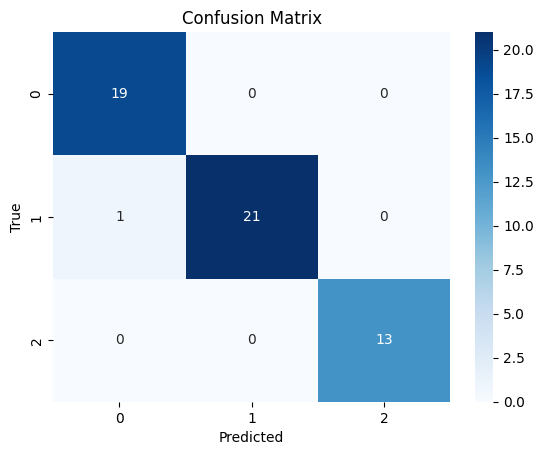

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred_pca = classifier_pca.predict(X_test_pca)
cm = confusion_matrix(y_test, y_pred_pca)

# plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred_pca)
precision = precision_score(y_test, y_pred_pca, average='weighted')
recall = recall_score(y_test, y_pred_pca, average='weighted')
f1 = f1_score(y_test, y_pred_pca, average='weighted')

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca))

Accuracy: 0.9815
Precision: 0.9824
Recall: 0.9815
F1 Score: 0.9815

Classification Report:
              precision    recall  f1-score   support

           1       0.95      1.00      0.97        19
           2       1.00      0.95      0.98        22
           3       1.00      1.00      1.00        13

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



## Without PCA transformation

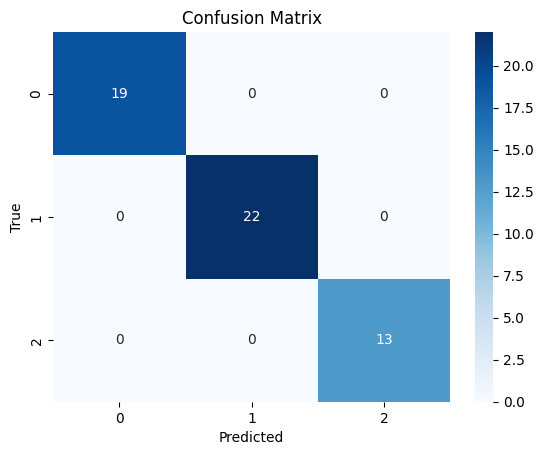

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        22
           3       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



## Visualising the Training set results

In [ ]:
X_set[:, 0].min()

-4.141150284696799

In [ ]:
X1

array([[-5.14115028, -5.13115028, -5.12115028, ...,  4.59884972,
         4.60884972,  4.61884972],
       [-5.14115028, -5.13115028, -5.12115028, ...,  4.59884972,
         4.60884972,  4.61884972],
       [-5.14115028, -5.13115028, -5.12115028, ...,  4.59884972,
         4.60884972,  4.61884972],
       ...,
       [-5.14115028, -5.13115028, -5.12115028, ...,  4.59884972,
         4.60884972,  4.61884972],
       [-5.14115028, -5.13115028, -5.12115028, ...,  4.59884972,
         4.60884972,  4.61884972],
       [-5.14115028, -5.13115028, -5.12115028, ...,  4.59884972,
         4.60884972,  4.61884972]])

<ipython-input-16-4b585eb1d7d1>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


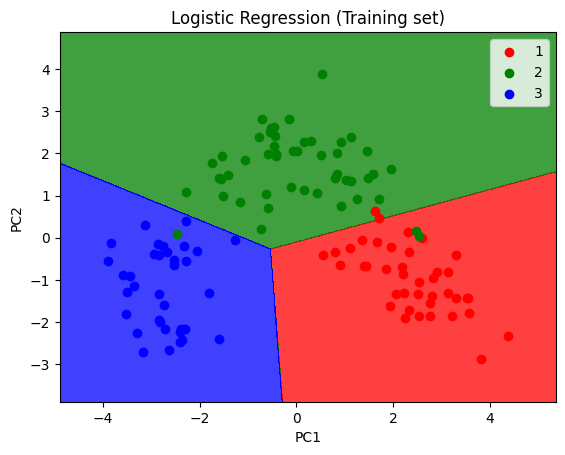

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_pca.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Visualising the Test set results

<ipython-input-17-29bd331a49f3>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


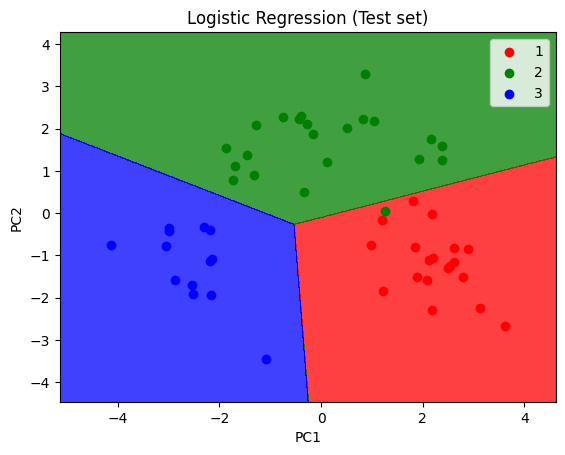

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_pca.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Analyzing PCA

In [ ]:
from sklearn.decomposition import PCA

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA(n_components = 4)
X_pca = pca.fit_transform(X)

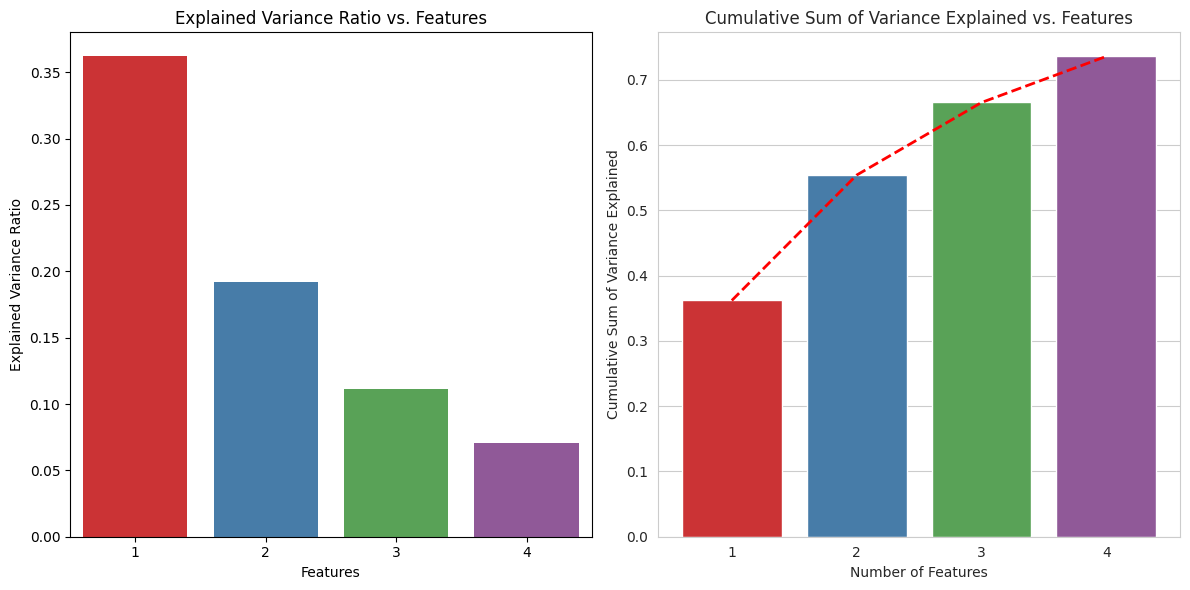

In [ ]:
import seaborn as sns

eigenvalues = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(eigenvalues)

comps = np.arange(0, len(eigenvalues), 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=comps+1, y=eigenvalues, hue=comps+1, palette='Set1', dodge=False, legend=False)
sns.set_style('whitegrid')
plt.title('Explained Variance Ratio vs. Features')
plt.xlabel('Features')
plt.ylabel('Explained Variance Ratio')

plt.subplot(1, 2, 2)
sns.barplot(x=comps+1, y=cum_sum_eigenvalues, hue=comps+1, palette='Set1', dodge=False, legend=False)
plt.plot(comps, cum_sum_eigenvalues, 'r--', linewidth=2)
plt.title('Cumulative Sum of Variance Explained vs. Features')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Sum of Variance Explained')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.decomposition import PCA

sc = StandardScaler()
X = sc.fit_transform(X)

pca = PCA(n_components = 8)
X_pca = pca.fit_transform(X)

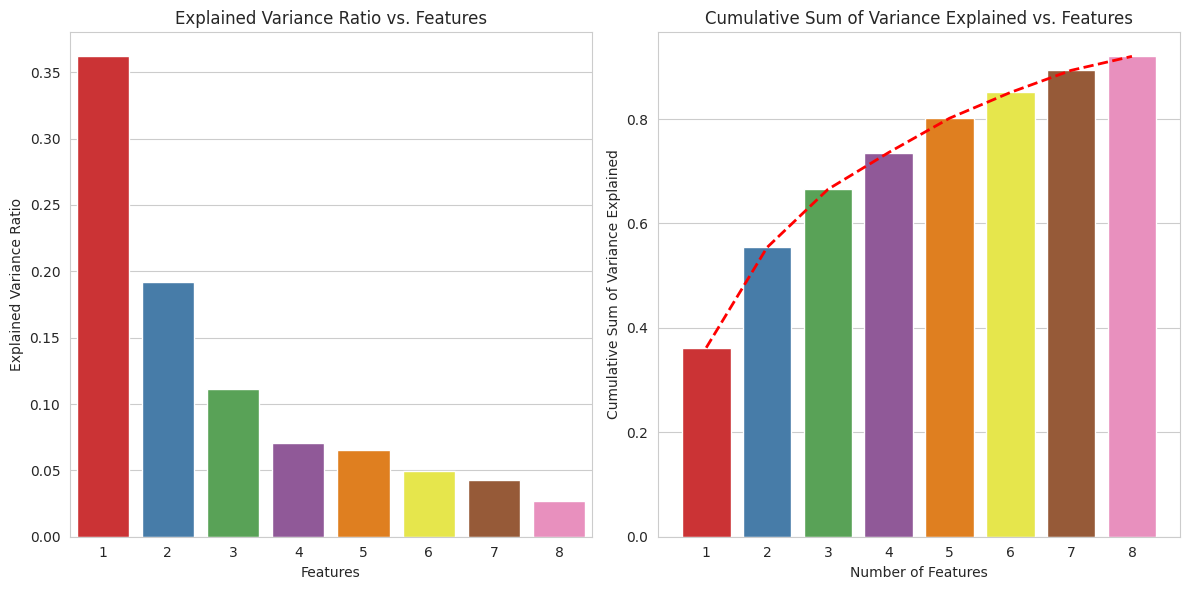

In [ ]:
import seaborn as sns

eigenvalues = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(eigenvalues)

comps = np.arange(0, len(eigenvalues), 1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=comps+1, y=eigenvalues, hue=comps+1, palette='Set1', dodge=False, legend=False)
sns.set_style('whitegrid')
plt.title('Explained Variance Ratio vs. Features')
plt.xlabel('Features')
plt.ylabel('Explained Variance Ratio')

plt.subplot(1, 2, 2)
sns.barplot(x=comps+1, y=cum_sum_eigenvalues, hue=comps+1, palette='Set1', dodge=False, legend=False)
plt.plot(comps, cum_sum_eigenvalues, 'r--', linewidth=2)
plt.title('Cumulative Sum of Variance Explained vs. Features')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Sum of Variance Explained')

plt.tight_layout()
plt.show()


# Visualizing the transformation

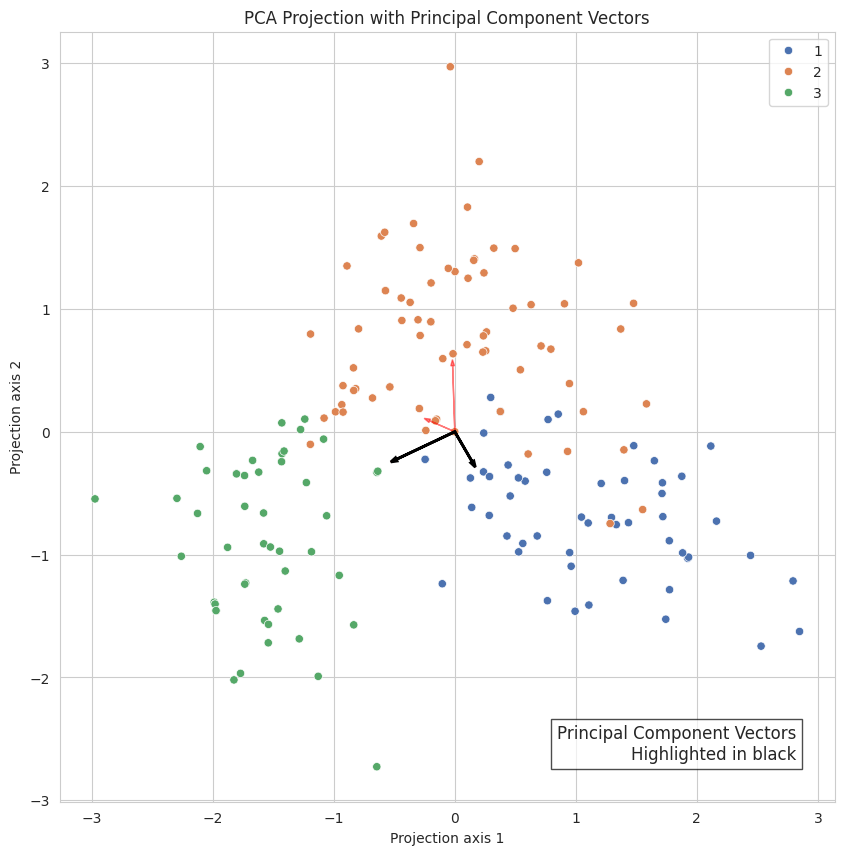

In [ ]:
newdataset = pca.transform(X.astype(int))
# newdataframe = pd.DataFrame(newdataset, columns=['a','b','c','d','e','f','g','h'])
newdataframe = pd.DataFrame(newdataset, columns=['a','b','c','d'])

plt.figure(figsize=(10,10))
sns.scatterplot(data=newdataframe, x='a', y='b', hue=y, palette='deep')

components = pca.components_[:2]  # First two principal components

# Show the projections of all the eigenvectors on the transformed space
for i in range(pca.n_components_):
    plt.arrow(0, 0, pca.components_[i, 0], pca.components_[i, 1],
              head_width=0.03, head_length=0.05, fc='red', ec='red', alpha=0.5)

for i in range(2):
    plt.arrow(0, 0, components[i, 0], components[i, 1],
              head_width=0.03, head_length=0.05, fc='black', ec='black', lw=2)

plt.text(0.95, 0.05, 'Principal Component Vectors\nHighlighted in black',
         bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'),
         fontsize=12, ha='right', va='bottom', transform=plt.gca().transAxes)

plt.xlabel('Projection axis 1')
plt.ylabel('Projection axis 2')
plt.title('PCA Projection with Principal Component Vectors')
plt.show()


## t-SNE visualization

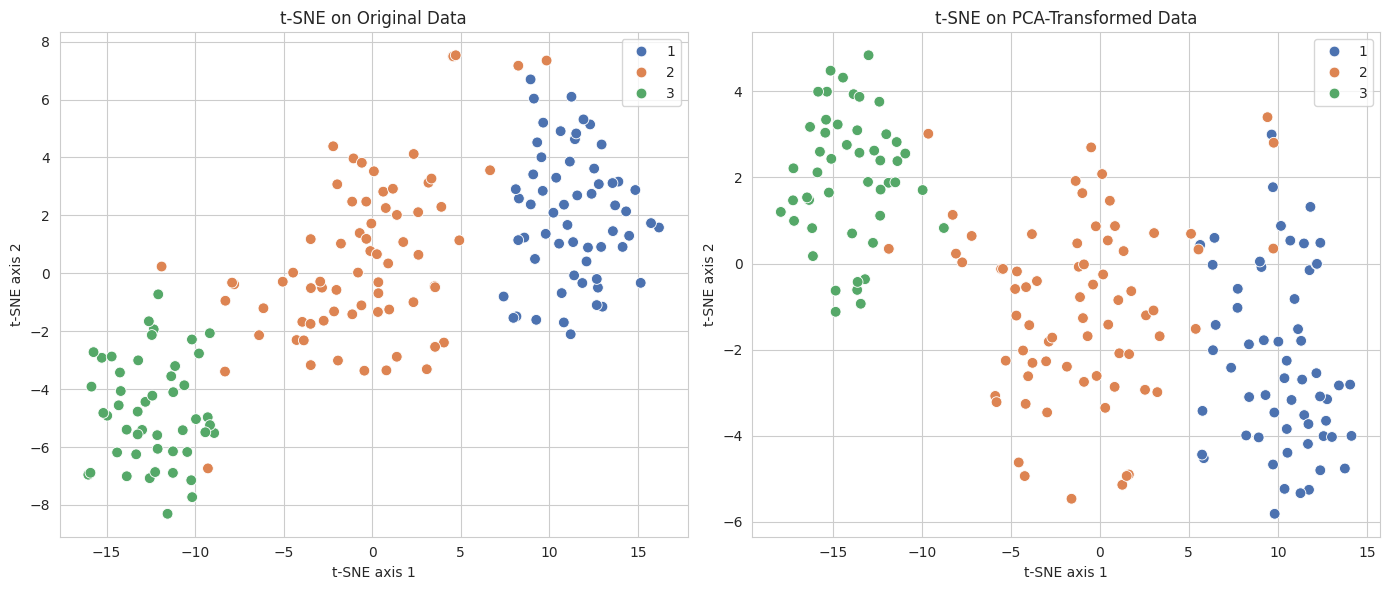

In [ ]:
from sklearn.manifold import TSNE

tsne_original = TSNE(n_components=2, random_state=42)
X_tsne = tsne_original.fit_transform(X)

tsne_pca = TSNE(n_components=2, random_state=42)
X_pca_tsne = tsne_pca.fit_transform(X_pca)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='deep', s=60)
plt.title('t-SNE on Original Data')
plt.xlabel('t-SNE axis 1')
plt.ylabel('t-SNE axis 2')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_pca_tsne[:, 0], y=X_pca_tsne[:, 1], hue=y, palette='deep', s=60)
plt.title('t-SNE on PCA-Transformed Data')
plt.xlabel('t-SNE axis 1')
plt.ylabel('t-SNE axis 2')

plt.tight_layout()
plt.show()
